In [35]:
from spectogram_utils import spec_to_pd_dataframe, change_resolution_over_freq, change_resolution_over_time, plot_spectogram, download_spectogram_from_df_row
import pandas as pd
from radiospectra.sources import CallistoSpectrogram

In [2]:
burst_list = pd.read_excel('burst_list.xlsx')
duration = pd.Timedelta('30m')

In [26]:
burst_list[burst_list.type == 'V']

,date,time,type,instruments,time_start,time_end,date_start,date_end,datetime_start,datetime_end
675,20210521,05:13-05:15,V,ALMATY,05:13,05:15,20210521,20210521,2021-05-21 05:13:00,2021-05-21 05:15:00
676,20210521,05:13-05:15,V,AUSTRIA-UNIGRAZ,05:13,05:15,20210521,20210521,2021-05-21 05:13:00,2021-05-21 05:15:00
677,20210521,05:13-05:15,V,Australia-ASSA,05:13,05:15,20210521,20210521,2021-05-21 05:13:00,2021-05-21 05:15:00
678,20210521,05:13-05:15,V,Australia-ASSA,05:13,05:15,20210521,20210521,2021-05-21 05:13:00,2021-05-21 05:15:00
679,20210521,05:13-05:15,V,BIR,05:13,05:15,20210521,20210521,2021-05-21 05:13:00,2021-05-21 05:15:00
...,...,...,...,...,...,...,...,...,...,...
19812,20221207,08:38-08:39,V,SWISS-HEITERSWIL,08:38,08:39,20221207,20221207,2022-12-07 08:38:00,2022-12-07 08:39:00
19813,20221207,08:38-08:39,V,SWISS-IRSOL,08:38,08:39,20221207,20221207,2022-12-07 08:38:00,2022-12-07 08:39:00
19814,20221207,08:38-08:39,V,SWISS-Landschlacht,08:38,08:39,20221207,20221207,2022-12-07 08:38:00,2022-12-07 08:39:00
19815,20221207,08:38-08:39,V,SWISS-MUHEN,08:38,08:39,20221207,20221207,2022-12-07 08:38:00,2022-12-07 08:39:00


In [36]:
def download_spectogram(df_row, mid_time, duration, subtract_background=True):
    spec = CallistoSpectrogram.from_range(df_row['instruments'], mid_time - duration / 2,  mid_time + duration / 2)
    spec = spec.remove_border()
    if subtract_background:
        spec = spec.subtract_bg()
    return spec
    spec = spec_to_pd_dataframe(spec, df_row)
    spec = spec[mid_time - duration / 2:mid_time + duration / 2]
    return spec

def download_spectogram_from_df_row(df_row, duration):
    mid_time = df_row['datetime_start'] + (df_row['datetime_end'] - df_row['datetime_start']) / 2
    return download_spectogram(df_row, mid_time, duration)


In [37]:
spec = download_spectogram_from_df_row(burst_list.iloc[677], duration)

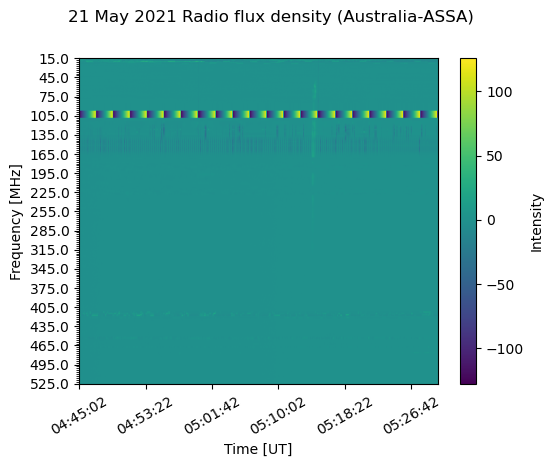

<AxesSubplot: xlabel='Time [UT]', ylabel='Frequency [MHz]'>

In [38]:
spec.peek()

In [27]:
spec = download_spectogram_from_df_row(burst_list.iloc[677], duration)
# Elim wrong channels from radiospectra OLD

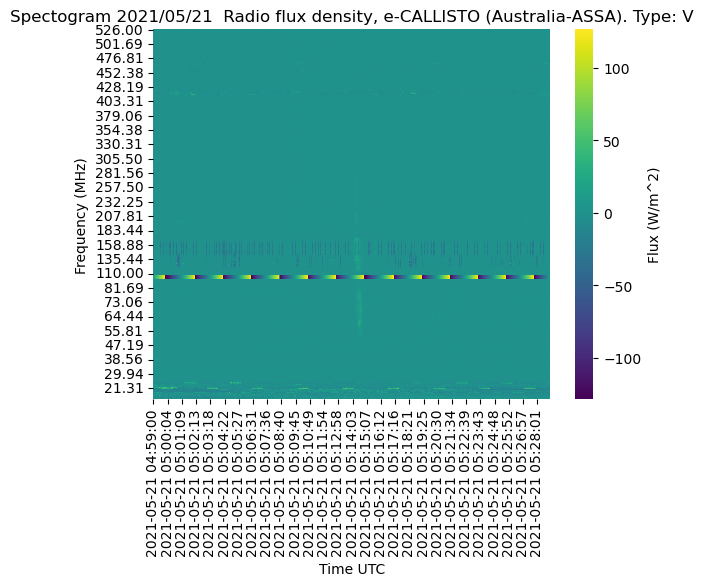

In [28]:
plot_spectogram(spec)

In [29]:
spec = change_resolution_over_time(spec, 100)

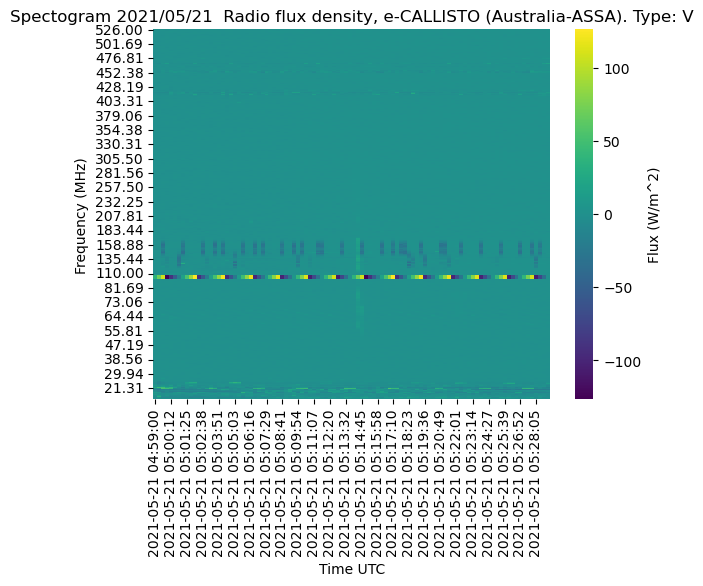

In [30]:
plot_spectogram(spec)

In [31]:
spec = change_resolution_over_freq(spec, 100)

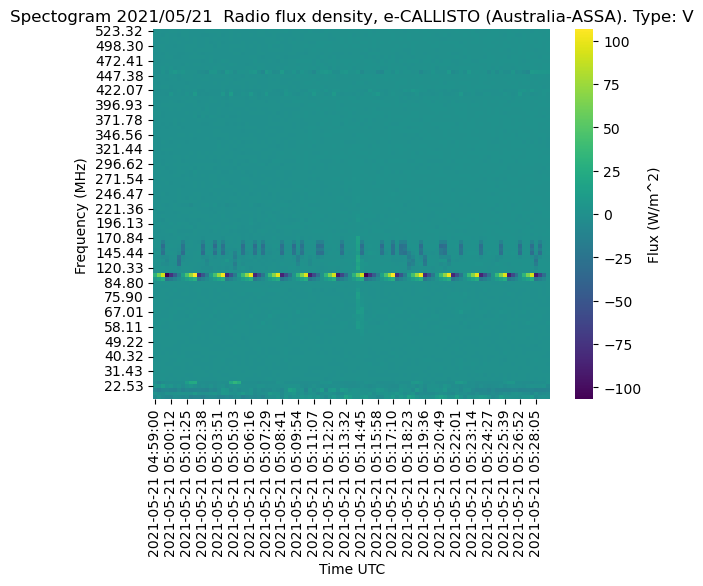

In [32]:
plot_spectogram(spec)
# Inverse spectogram

In [33]:
spec.shape

(100, 100)